In [1]:
import pandas as pd

In [2]:
%cd ~/src/fitness/analysis

/Users/dane/src/fitness/analysis


In [14]:
df = pd.read_json('./blood_pressure_data.json')

In [15]:
df.iloc[0]

sourceName                         Kardia
creationDate    2023-06-25 08:55:15 -0800
startDate       2023-06-18 17:24:22 -0800
endDate         2023-06-18 17:24:22 -0800
systolic                              117
diastolic                              70
Name: 0, dtype: object

In [16]:
# convert date strings to dates
df['startDate'] = pd.to_datetime(df.startDate)
df['endDate']   = pd.to_datetime(df.endDate)
df['creationDate'] = pd.to_datetime(df.creationDate)

In [17]:
# what data sources contributed data?
df.sourceName.value_counts()

sourceName
OMRON connect    486
Kardia           296
Health           200
Name: count, dtype: int64

This seems reasonable

In [18]:
for n in df.sourceName.unique():
    min = df[df.sourceName == n].startDate.min()
    max = df[df.sourceName == n].startDate.max()
    print(f'{n:20s} has data from {min:%Y/%m/%d} to {max:%Y/%m/%d}')

Kardia               has data from 2022/06/06 to 2023/08/18
OMRON connect        has data from 2019/01/02 to 2021/06/24
Health               has data from 2015/06/06 to 2016/08/05


In [19]:
for n in df.sourceName.unique():
    smin = df[df.sourceName == n].systolic.min()
    smax = df[df.sourceName == n].systolic.max()
    dmin = df[df.sourceName == n].diastolic.min()
    dmax = df[df.sourceName == n].diastolic.max()
    print(f'{n:20s} has data ranging from {smin} to {smax} / {dmin} to {dmax}')

Kardia               has data ranging from 86 to 147 / 43 to 86
OMRON connect        has data ranging from 86 to 141 / 43 to 87
Health               has data ranging from 75 to 125 / 49 to 76


This seems reasonable while not being that informative. A histogram might be more useful.

<Axes: >

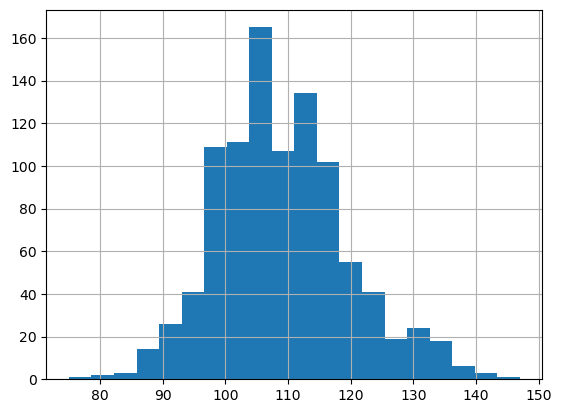

In [20]:
df.systolic.hist(bins=20)

<Axes: >

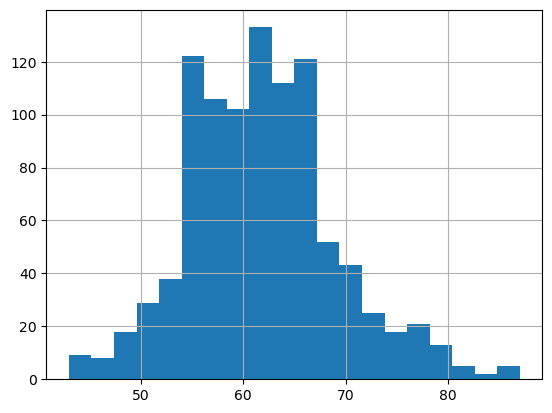

In [21]:
df.diastolic.hist(bins=20)

This data seems completely reasonable.